In [122]:
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline

In [31]:
# consider y = 0.8 x^2 + 0.9x + 2
X = 6* np.random.rand(200,1) -3
y = 0.8*(X**2) + 0.9*X + 2 + 3*np.random.rand(200,1)

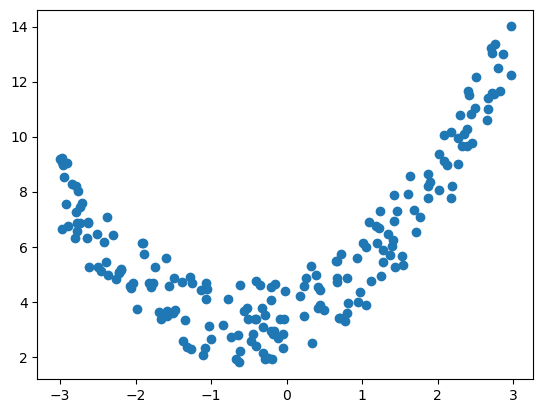

In [33]:
plt.scatter(X,y)
plt.show()

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)

In [41]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

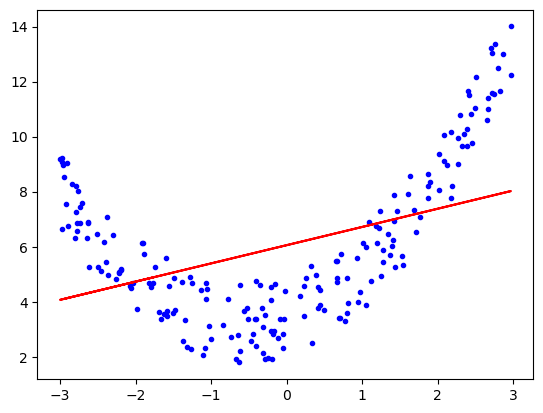

In [57]:
plt.plot(X,y,'b.')
plt.plot(X_train,lr.predict(X_train),'red')
plt.show()

# Polynomial Regression

In [62]:
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [78]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)

LinearRegression()

In [110]:
# this linspace is required since X is not in sorted order 
# in case of line it doesn't impact because it is linear
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr_poly.predict(X_new_poly)

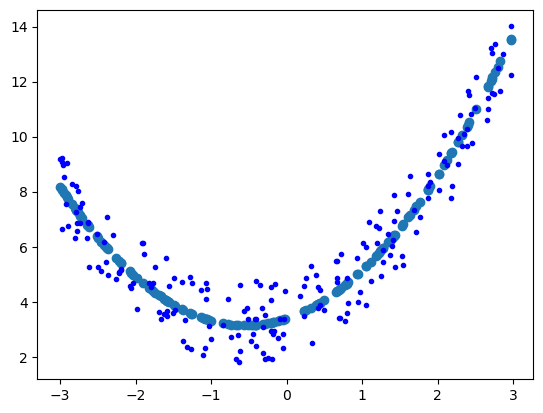

In [112]:
plt.plot(X,y,'b.')
plt.scatter(X_train,lr_poly.predict(X_train_poly))
# here gaps are issue so need linear Space
plt.show()

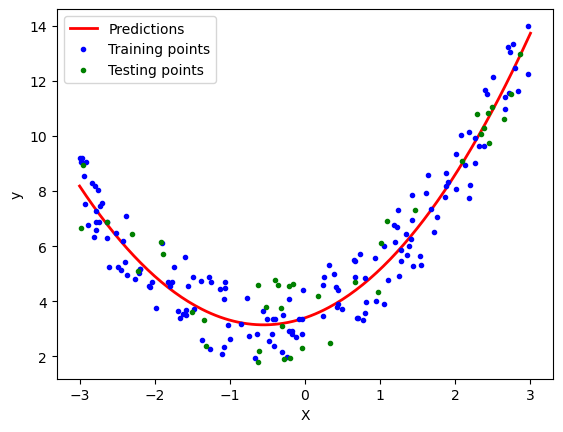

In [118]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [234]:
def polyRegression(X_train,X_test,y_train,y_test,degree=2):
    poly_feat = PolynomialFeatures(degree=degree,include_bias=False)
    scaler = StandardScaler()
    lin_reg = LinearRegression()
    poly_reg = Pipeline([
        ('PolyFeatures',poly_feat),
        ('Scaler',scaler),
        ('lin_reg',lin_reg)
    ])

    poly_reg.fit(X_train,y_train)
    X_new = np.linspace(-3,3,X_train.shape[0]+X_test.shape[0]).reshape(X_train.shape[0] + X_test.shape[0],1)
    y_new = poly_reg.predict(X_new)
    
    plt.plot(X_new, y_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test,'gx')
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4, 4, 1, 12])
    plt.show()

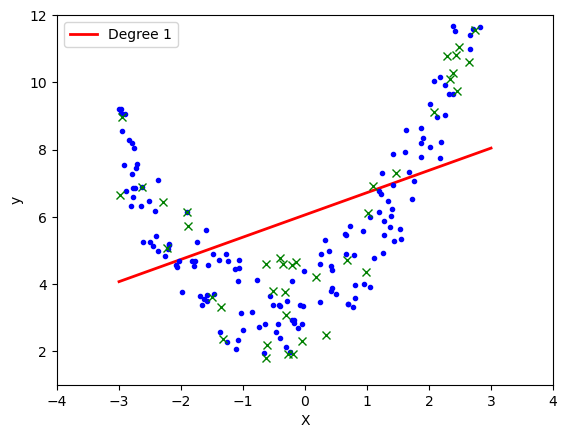

In [238]:
polyRegression(X_train,X_test,y_train,y_test,1)

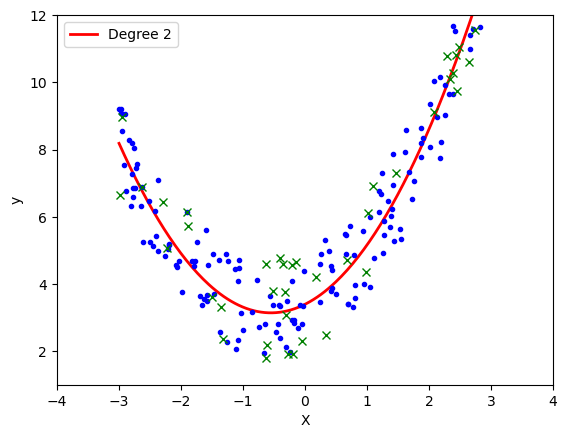

In [240]:
polyRegression(X_train,X_test,y_train,y_test,2)


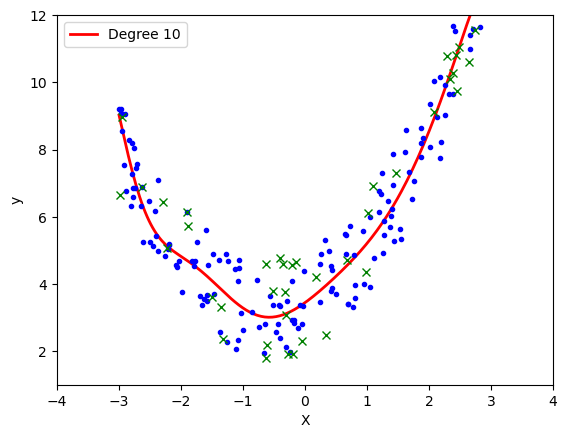

In [244]:
polyRegression(X_train,X_test,y_train,y_test,10)

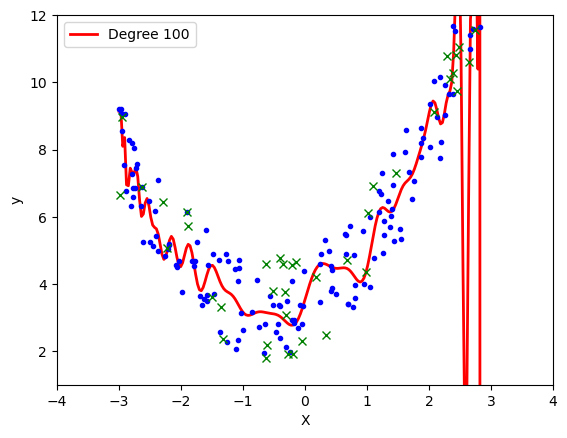

In [254]:
polyRegression(X_train,X_test,y_train,y_test,100)